In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.lines as mlines
import os
import sys

# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
# from modules import swap_classes, get_legend, visualize_annotation

## Visualize annotation

In [2]:
image_folder = './WE3DS/images/'
annotation_folder = './WE3DS/annotations/'
annotations_aggregated_folder = './WE3DS/annotations_aggregated/'
# Define the paths to the images and annotations
image_paths = np.array(os.listdir(image_folder))
annotation_paths = np.array(os.listdir(annotation_folder))

In [3]:
color_values = [
    [255, 255, 255],
    [0, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 0, 0]
]

plant_classification = {
    'void': 'void',
    'soil': 'soil',
    'broad bean': 'crop',
    'corn spurry': 'weed',
    'red-root amaranth': 'weed',
    'common buckwheat': 'crop',
    'pea': 'crop',
    'red fingergrass': 'weed',
    'common wild oat': 'weed',
    'cornflower': 'weed',
    'corn cockle': 'weed',
    'corn': 'crop',
    'milk thistle': 'weed',
    'rye brome': 'weed',
    'soybean': 'crop',
    'sunflower': 'crop',
    'narrow-leaved plantain': 'weed',
    'small-flower geranium': 'weed',
    'sugar beet': 'crop',
    'weeds': 'weeds',
}

crop_indices = [index for index, value in enumerate(plant_classification) if plant_classification[value] == 'crop']
weed_indices = [index for index, value in enumerate(plant_classification) if plant_classification[value] == 'weed']

print("Crop indicies: ", crop_indices)
print("Weed indicies: ", weed_indices)

Crop indicies:  [2, 5, 6, 11, 14, 15, 18]
Weed indicies:  [3, 4, 7, 8, 9, 10, 12, 13, 16, 17]


In [4]:
hex_colors = ['#{:02X}{:02X}{:02X}'.format(r, g, b) for r, g, b in color_values]
print(hex_colors)

['#FFFFFF', '#000000', '#008000', '#808000', '#000080', '#800080', '#008080', '#808080', '#400000', '#C00000', '#408000', '#C08000', '#400080', '#C00080', '#408080', '#C08080', '#004000', '#804000', '#00C000', '#800000']


In [5]:
def get_legend(plant_classification, hex_colors):
    legend_elements = []
    for index, class_name in enumerate(plant_classification):
        element = mlines.Line2D([], [], color=hex_colors[index], marker='s', ls='', label=class_name)
        legend_elements.append(element)

    return legend_elements

In [6]:
def visualize_annotation_for_image(im):
    rgb = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            index = im[i, j]    
            rgb[i, j] = color_values[index[0]]

    plt.axis('off')
    plt.legend(handles=get_legend(plant_classification, hex_colors), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9)
    plt.imshow(rgb)
    plt.show()

def visualize_annotation(image_name):
    im = cv2.imread(annotation_folder + image_name)
    visualize_annotation_for_image(im)

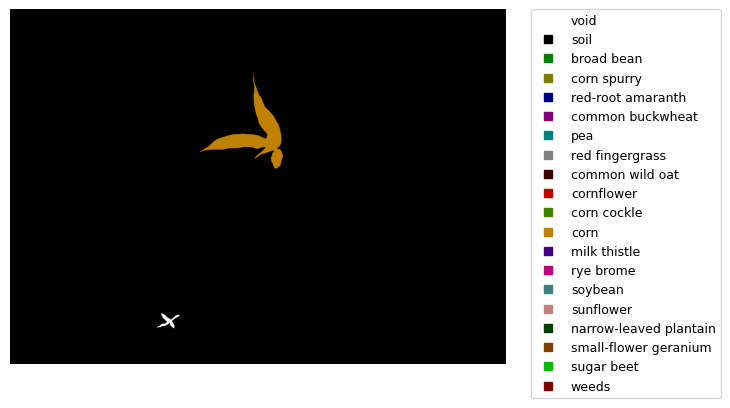

In [7]:
visualize_annotation('img_00000.png')

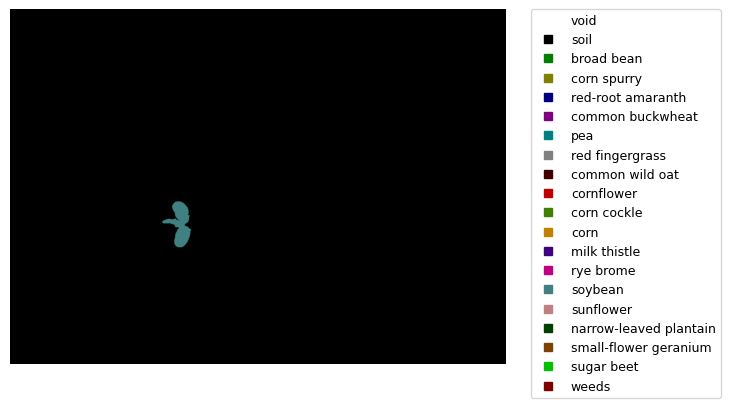

In [8]:
visualize_annotation('img_00045.png')

## Change classes in annotation mask

In [9]:
def swap_classes(class_pairs, image_name):
    im = cv2.imread(annotation_folder + image_name)

    for old_class, new_class in class_pairs:
        # Create a mask to identify pixels with the old class
        mask = (im[:, :, 0] == old_class)

        # Replace the matching pixels with the new class value
        im[mask, :] = [new_class, new_class, new_class]

    return im

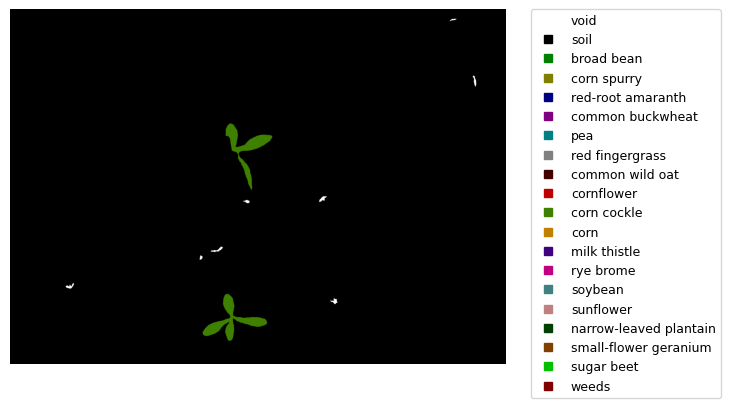

In [10]:
visualize_annotation('img_01109.png')

[ 1 10]


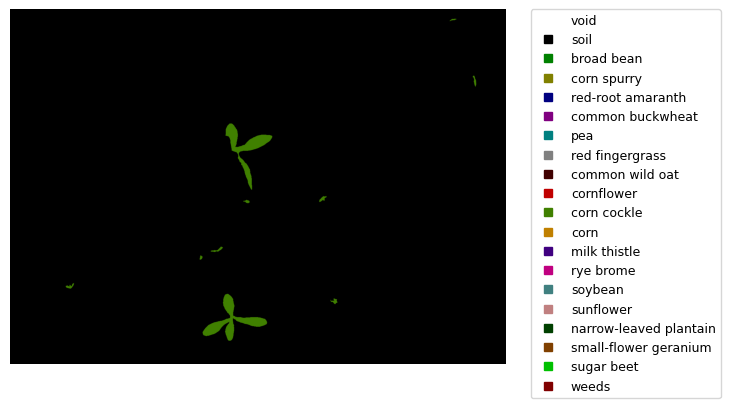

In [11]:
im = swap_classes([(0, 10)], 'img_01109.png')
print(np.unique(im))
visualize_annotation_for_image(im)

## Create aggregated annotations that do not differentiate between different weed types

In [12]:
# im = cv2.imread(annotations_aggregated_folder + 'img_01233.png')
# visualize_annotation_for_image(im)

In [13]:
# Initial function that swaps all weed plant types with 'weeds' class 19
for annotation_path in annotation_paths:
    if not os.path.isfile(annotations_aggregated_folder + annotation_path):
        im = swap_classes(weed_indices, 19, annotation_path)
        cv2.imwrite(annotations_aggregated_folder + annotation_path, im)

In [14]:
# Class swapping for binary models
weed_swap_class_list = [(x, 3) for x in weed_indices]
print(weed_swap_class_list)

for crop_index in crop_indices:
    for annotation_path in annotation_paths:
        path = 'WE3DS/annotations_binary/' + list(plant_classification.keys())[crop_index].replace(" ", "_") + '/' + annotation_path

        if not os.path.isfile(path):
            im = swap_classes([(crop_index, 2)] + weed_swap_class_list, annotation_path)
            cv2.imwrite(path, im)

In [15]:
# Class swapping for multi-class models
weed_swap_class_list = [(weed_index, 3 + i) for i, weed_index in enumerate(weed_indices)]
print(weed_swap_class_list)

for crop_index in crop_indices:
    for annotation_path in annotation_paths:
        path = 'WE3DS/annotations_multiclass/' + list(plant_classification.keys())[crop_index].replace(" ", "_") + '/' + annotation_path

        if not os.path.isfile(path):
            im = swap_classes([(crop_index, 2)] + weed_swap_class_list, annotation_path)
            cv2.imwrite(path, im)

[(3, 3), (4, 4), (7, 5), (8, 6), (9, 7), (10, 8), (12, 9), (13, 10), (16, 11), (17, 12)]
